In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import pandas_datareader.data as web
from time import time
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [92]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [93]:
base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

In [94]:
X1.describe()

Attributes    Adj Close             
Symbols           GOOGL          IBM
count       1258.000000  1258.000000
mean          83.690025   115.560895
std           31.469795    10.849045
min           49.233501    79.847008
25%           57.320874   109.069330
50%           70.215748   114.256027
75%          112.697622   124.298130
max          149.838501   141.102219

In [95]:
X2.describe()

,DEXJPUS,DEXUSUK
count,1242.000000,1242.000000
mean,112.112488,1.309215
std,8.207207,0.061567
min,102.520000,1.070300
25%,107.700000,1.270600
50%,109.810000,1.310400
75%,112.845000,1.356200
max,144.710000,1.433200


In [96]:
X3.describe()

,SP500,DJIA,VIXCLS
count,1257.000000,1257.000000,1260.000000
mean,3391.481209,28640.340573,20.660532
std,684.669130,4089.807561,8.675792
min,2237.400000,18591.930000,9.140000
25%,2800.710000,25339.990000,14.765000
50%,3133.640000,27192.450000,18.865000
75%,4019.870000,32654.590000,24.705000
max,4796.560000,36799.650000,82.690000


In [97]:
X1.fillna(X1.median(),inplace = True)
X2.fillna(X2.median(),inplace = True)
X3.fillna(X3.median(),inplace = True)


C:\Users\Asus\AppData\Local\Temp/ipykernel_9564/15481099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.fillna(X1.median(),inplace = True)
C:\Users\Asus\AppData\Local\Temp/ipykernel_9564/15481099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.fillna(X1.median(),inplace = True)


In [98]:
scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1.values),index = X1.index,columns=X1.columns)
X2 = pd.DataFrame(scaler.fit_transform(X2.values),index = X2.index,columns=X2.columns)
X3 = pd.DataFrame(scaler.fit_transform(X3.values),index = X3.index,columns=X3.columns)

In [99]:
X1

Attributes Adj Close          
Symbols        GOOGL       IBM
Date                          
2017-10-06 -1.081086 -0.475714
2017-10-09 -1.083200 -0.412468
2017-10-10 -1.090368 -0.335324
2017-10-11 -1.061996 -0.396482
2017-10-12 -1.061996 -0.437487
...              ...       ...
2022-09-29  0.436464  0.559636
2022-09-30  0.380197  0.299602
2022-10-03  0.475247  0.548571
2022-10-04  0.570614  0.916492
2022-10-05  0.563939  0.938622

[1258 rows x 2 columns]

In [100]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-10-09,-0.273845,0.018827
2017-10-10,0.017458,0.203352
2017-10-11,0.042356,0.195040
2017-10-12,0.046090,0.135194
2017-10-13,-0.008684,0.351305
...,...,...
2022-09-26,4.038431,-3.972569
2022-09-27,4.070798,-3.889450
2022-09-28,4.001084,-3.758121


In [101]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2017-10-09,-1.243006,-1.448259,-1.203560
2017-10-10,-1.234236,-1.430961,-1.232854
2017-10-11,-1.227410,-1.420472,-1.259805
2017-10-12,-1.233805,-1.428394,-1.252774
2017-10-13,-1.230481,-1.420763,-1.287928
...,...,...,...
2022-09-29,0.382988,0.158137,1.316922
2022-09-30,0.301595,0.033866,1.291143
2022-10-03,0.439317,0.224058,1.113034


In [102]:
Y = pd.DataFrame()
return_period = 1
backHistory = [30, 45, 60, 90, 180, 240]
BH1, BH2, BH3 = backHistory[1], backHistory[3], backHistory[4]
Y = base.shift(-return_period)
X4_BH1 = base.diff( BH1).shift( - BH1)
X4_BH2 = base.diff( BH2).shift( - BH2)
X4_BH3 = base.diff( BH3).shift( - BH3)

X4 = pd.concat([X4_BH1, X4_BH2, X4_BH3], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

In [103]:
Y

Date
2017-10-06     71.685875
2017-10-09     71.685875
2017-10-10     71.808029
2017-10-11     72.465797
2017-10-12     72.813461
                 ...    
2022-09-29    232.899994
2022-09-30    240.740005
2022-10-03    248.880005
2022-10-04    249.199997
2022-10-05           NaN
Name: (Adj Close, MSFT), Length: 1258, dtype: float64

In [104]:
X4

,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,
2017-10-06,0.122731,0.100006,-0.240498
2017-10-09,0.126019,0.063751,-0.288987
2017-10-10,0.113714,0.091310,-0.260042
2017-10-11,0.071490,0.039302,-0.263977
2017-10-12,0.149776,0.021954,-0.245130
...,...,...,...
2022-09-29,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN
2022-10-03,NaN,NaN,NaN


In [105]:
X = pd.concat([X1, X2, X3, X4], axis=1)
dataset = pd.concat([Y, X], axis=1)

In [106]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-06,-1.081086,-0.475714,NaN,NaN,NaN,NaN,NaN,0.122731,0.100006,-0.240498
2017-10-09,-1.083200,-0.412468,-0.273845,0.018827,-1.243006,-1.448259,-1.203560,0.126019,0.063751,-0.288987
2017-10-10,-1.090368,-0.335324,0.017458,0.203352,-1.234236,-1.430961,-1.232854,0.113714,0.091310,-0.260042
2017-10-11,-1.061996,-0.396482,0.042356,0.195040,-1.227410,-1.420472,-1.259805,0.071490,0.039302,-0.263977
2017-10-12,-1.061996,-0.437487,0.046090,0.135194,-1.233805,-1.428394,-1.252774,0.149776,0.021954,-0.245130
...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.436464,0.559636,4.038431,-3.399045,0.382988,0.158137,1.316922,NaN,NaN,NaN
2022-09-30,0.380197,0.299602,4.070798,-3.256079,0.301595,0.033866,1.291143,NaN,NaN,NaN
2022-10-03,0.475247,0.548571,NaN,NaN,0.439317,0.224058,1.113034,NaN,NaN,NaN
2022-10-04,0.570614,0.916492,NaN,NaN,0.606259,0.429172,0.992341,NaN,NaN,NaN


In [107]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-06,71.685875,-1.081086,-0.475714,NaN,NaN,NaN,NaN,NaN,0.122731,0.100006,-0.240498
2017-10-09,71.685875,-1.083200,-0.412468,-0.273845,0.018827,-1.243006,-1.448259,-1.203560,0.126019,0.063751,-0.288987
2017-10-10,71.808029,-1.090368,-0.335324,0.017458,0.203352,-1.234236,-1.430961,-1.232854,0.113714,0.091310,-0.260042
2017-10-11,72.465797,-1.061996,-0.396482,0.042356,0.195040,-1.227410,-1.420472,-1.259805,0.071490,0.039302,-0.263977
2017-10-12,72.813461,-1.061996,-0.437487,0.046090,0.135194,-1.233805,-1.428394,-1.252774,0.149776,0.021954,-0.245130
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,232.899994,0.436464,0.559636,4.038431,-3.399045,0.382988,0.158137,1.316922,NaN,NaN,NaN
2022-09-30,240.740005,0.380197,0.299602,4.070798,-3.256079,0.301595,0.033866,1.291143,NaN,NaN,NaN
2022-10-03,248.880005,0.475247,0.548571,NaN,NaN,0.439317,0.224058,1.113034,NaN,NaN,NaN
2022-10-04,249.199997,0.570614,0.916492,NaN,NaN,0.606259,0.429172,0.992341,NaN,NaN,NaN


In [108]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2017-10-06 to 2022-10-05
Freq: B
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, MSFT)   1257 non-null   float64
 1   (Adj Close, GOOGL)  1258 non-null   float64
 2   (Adj Close, IBM)    1258 non-null   float64
 3   DEXJPUS             1300 non-null   float64
 4   DEXUSUK             1300 non-null   float64
 5   SP500               1303 non-null   float64
 6   DJIA                1303 non-null   float64
 7   VIXCLS              1303 non-null   float64
 8   MSFT_3DT            1213 non-null   float64
 9   MSFT_6DT            1168 non-null   float64
 10  MSFT_12DT           1078 non-null   float64
dtypes: float64(11)
memory usage: 122.2 KB


ที่ drop ทั้งหมดเพราะว่าค่าที่คำนวณแล้วเป็น NaN ถือว่าใช้ไม่ได้

In [109]:
dataset=dataset.dropna()

In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1077 entries, 2017-10-09 to 2022-01-18
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, MSFT)   1077 non-null   float64
 1   (Adj Close, GOOGL)  1077 non-null   float64
 2   (Adj Close, IBM)    1077 non-null   float64
 3   DEXJPUS             1077 non-null   float64
 4   DEXUSUK             1077 non-null   float64
 5   SP500               1077 non-null   float64
 6   DJIA                1077 non-null   float64
 7   VIXCLS              1077 non-null   float64
 8   MSFT_3DT            1077 non-null   float64
 9   MSFT_6DT            1077 non-null   float64
 10  MSFT_12DT           1077 non-null   float64
dtypes: float64(11)
memory usage: 101.0 KB


In [111]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-09,71.685875,-1.083200,-0.412468,-0.273845,0.018827,-1.243006,-1.448259,-1.203560,0.126019,0.063751,-0.288987
2017-10-10,71.808029,-1.090368,-0.335324,0.017458,0.203352,-1.234236,-1.430961,-1.232854,0.113714,0.091310,-0.260042
2017-10-11,72.465797,-1.061996,-0.396482,0.042356,0.195040,-1.227410,-1.420472,-1.259805,0.071490,0.039302,-0.263977
2017-10-12,72.813461,-1.061996,-0.437487,0.046090,0.135194,-1.233805,-1.428394,-1.252774,0.149776,0.021954,-0.245130
2017-10-13,72.963806,-1.058468,-0.432621,-0.008684,0.351305,-1.230481,-1.420763,-1.287928,0.104941,0.097111,-0.280311
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-11,316.204041,1.781653,1.156337,0.419555,0.879945,1.974643,1.904155,-0.256768,-1.469032,-3.022918,-2.983669
2022-01-12,302.821503,1.835520,1.220345,0.339883,1.006286,1.994350,1.913672,-0.349338,-1.360370,-2.829111,-3.202946
2022-01-13,308.186462,1.745128,1.324358,0.255231,1.049508,1.894452,1.869763,-0.034131,-0.673930,-2.330709,-2.611532
2022-01-14,300.685425,1.773531,1.275464,0.234068,0.959739,1.900121,1.819615,-0.165370,-0.701501,-2.430397,-2.534199


In [112]:
ying = dataset.columns[0]
dataset = dataset.drop(dataset.columns[0],axis = 1)

In [113]:
dataset

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-09,-1.083200,-0.412468,-0.273845,0.018827,-1.243006,-1.448259,-1.203560,0.126019,0.063751,-0.288987
2017-10-10,-1.090368,-0.335324,0.017458,0.203352,-1.234236,-1.430961,-1.232854,0.113714,0.091310,-0.260042
2017-10-11,-1.061996,-0.396482,0.042356,0.195040,-1.227410,-1.420472,-1.259805,0.071490,0.039302,-0.263977
2017-10-12,-1.061996,-0.437487,0.046090,0.135194,-1.233805,-1.428394,-1.252774,0.149776,0.021954,-0.245130
2017-10-13,-1.058468,-0.432621,-0.008684,0.351305,-1.230481,-1.420763,-1.287928,0.104941,0.097111,-0.280311
...,...,...,...,...,...,...,...,...,...,...
2022-01-11,1.781653,1.156337,0.419555,0.879945,1.974643,1.904155,-0.256768,-1.469032,-3.022918,-2.983669
2022-01-12,1.835520,1.220345,0.339883,1.006286,1.994350,1.913672,-0.349338,-1.360370,-2.829111,-3.202946
2022-01-13,1.745128,1.324358,0.255231,1.049508,1.894452,1.869763,-0.034131,-0.673930,-2.330709,-2.611532
2022-01-14,1.773531,1.275464,0.234068,0.959739,1.900121,1.819615,-0.165370,-0.701501,-2.430397,-2.534199


In [114]:
data = dataset.corr()
data

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
"(Adj Close, GOOGL)",1.000000,0.503207,0.138632,0.486803,0.983140,0.954212,0.036358,-0.004249,-0.123368,-0.410191
"(Adj Close, IBM)",0.503207,1.000000,0.260845,0.586397,0.523560,0.603586,-0.530675,-0.034274,-0.099699,-0.402432
DEXJPUS,0.138632,0.260845,1.000000,0.086975,0.061761,0.107197,-0.391852,-0.307626,-0.454309,-0.589489
DEXUSUK,0.486803,0.586397,0.086975,1.000000,0.490037,0.534163,-0.301723,0.050624,0.005947,-0.207592
SP500,0.983140,0.523560,0.061761,0.490037,1.000000,0.983618,-0.009102,-0.034504,-0.103436,-0.327005
DJIA,0.954212,0.603586,0.107197,0.534163,0.983618,1.000000,-0.138763,-0.049728,-0.095208,-0.316076
VIXCLS,0.036358,-0.530675,-0.391852,-0.301723,-0.009102,-0.138763,1.000000,0.278214,0.324359,0.249363
MSFT_3DT,-0.004249,-0.034274,-0.307626,0.050624,-0.034504,-0.049728,0.278214,1.000000,0.668760,0.420102
MSFT_6DT,-0.123368,-0.099699,-0.454309,0.005947,-0.103436,-0.095208,0.324359,0.668760,1.000000,0.699539
MSFT_12DT,-0.410191,-0.402432,-0.589489,-0.207592,-0.327005,-0.316076,0.249363,0.420102,0.699539,1.000000


<AxesSubplot:>

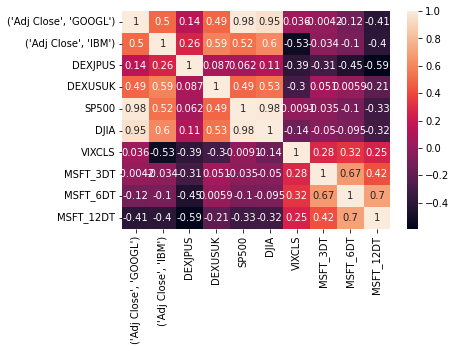

In [115]:
sns.heatmap(data,annot=True)

In [116]:
lower = pd.DataFrame(np.tril(data, -1),columns = data.columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.503207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.138632,0.260845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.486803,0.586397,0.086975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.983140,0.523560,0.061761,0.490037,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.954212,0.603586,0.107197,0.534163,0.983618,0.000000,0.000000,0.000000,0.000000,0.0
6,0.036358,-0.530675,-0.391852,-0.301723,-0.009102,-0.138763,0.000000,0.000000,0.000000,0.0
7,-0.004249,-0.034274,-0.307626,0.050624,-0.034504,-0.049728,0.278214,0.000000,0.000000,0.0
8,-0.123368,-0.099699,-0.454309,0.005947,-0.103436,-0.095208,0.324359,0.668760,0.000000,0.0
9,-0.410191,-0.402432,-0.589489,-0.207592,-0.327005,-0.316076,0.249363,0.420102,0.699539,0.0


In [117]:
to_drop = [column for column in lower if any(lower[column] > 0.9)]
dataset.drop(to_drop, inplace=True, axis=1)
dataset

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-09,-0.412468,-0.273845,0.018827,-1.448259,-1.203560,0.126019,0.063751,-0.288987
2017-10-10,-0.335324,0.017458,0.203352,-1.430961,-1.232854,0.113714,0.091310,-0.260042
2017-10-11,-0.396482,0.042356,0.195040,-1.420472,-1.259805,0.071490,0.039302,-0.263977
2017-10-12,-0.437487,0.046090,0.135194,-1.428394,-1.252774,0.149776,0.021954,-0.245130
2017-10-13,-0.432621,-0.008684,0.351305,-1.420763,-1.287928,0.104941,0.097111,-0.280311
...,...,...,...,...,...,...,...,...
2022-01-11,1.156337,0.419555,0.879945,1.904155,-0.256768,-1.469032,-3.022918,-2.983669
2022-01-12,1.220345,0.339883,1.006286,1.913672,-0.349338,-1.360370,-2.829111,-3.202946
2022-01-13,1.324358,0.255231,1.049508,1.869763,-0.034131,-0.673930,-2.330709,-2.611532
2022-01-14,1.275464,0.234068,0.959739,1.819615,-0.165370,-0.701501,-2.430397,-2.534199


In [118]:
dataset.insert(loc=0, column=ying, value=Y)

In [119]:
dataset

,"(Adj Close, MSFT)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-09,71.685875,-0.412468,-0.273845,0.018827,-1.448259,-1.203560,0.126019,0.063751,-0.288987
2017-10-10,71.808029,-0.335324,0.017458,0.203352,-1.430961,-1.232854,0.113714,0.091310,-0.260042
2017-10-11,72.465797,-0.396482,0.042356,0.195040,-1.420472,-1.259805,0.071490,0.039302,-0.263977
2017-10-12,72.813461,-0.437487,0.046090,0.135194,-1.428394,-1.252774,0.149776,0.021954,-0.245130
2017-10-13,72.963806,-0.432621,-0.008684,0.351305,-1.420763,-1.287928,0.104941,0.097111,-0.280311
...,...,...,...,...,...,...,...,...,...
2022-01-11,316.204041,1.156337,0.419555,0.879945,1.904155,-0.256768,-1.469032,-3.022918,-2.983669
2022-01-12,302.821503,1.220345,0.339883,1.006286,1.913672,-0.349338,-1.360370,-2.829111,-3.202946
2022-01-13,308.186462,1.324358,0.255231,1.049508,1.869763,-0.034131,-0.673930,-2.330709,-2.611532
2022-01-14,300.685425,1.275464,0.234068,0.959739,1.819615,-0.165370,-0.701501,-2.430397,-2.534199


In [120]:
Y = pd.DataFrame()
Y = dataset[ying]
Y

2017-10-09     71.685875
2017-10-10     71.808029
2017-10-11     72.465797
2017-10-12     72.813461
2017-10-13     72.963806
                 ...    
2022-01-11    316.204041
2022-01-12    302.821503
2022-01-13    308.186462
2022-01-14    300.685425
2022-01-18    301.361023
Name: (Adj Close, MSFT), Length: 1077, dtype: float64

In [121]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,167.972961,-0.219333,-0.339402,0.158692,-0.159628,-0.105327,0.123484,0.132846,0.000223
std,74.034560,0.887253,0.343331,0.888611,0.985143,1.041791,0.897187,0.911927,1.000902
min,71.685875,-3.293201,-1.181365,-2.660944,-2.484263,-1.343001,-3.762350,-3.726853,-3.528611
25%,102.960037,-0.706508,-0.581331,-0.408407,-0.875906,-0.780550,-0.266402,-0.230591,-0.394405
50%,145.565643,-0.251241,-0.324885,0.073686,-0.509326,-0.355197,0.098351,0.092802,0.077422
75%,217.564789,0.261576,-0.103296,0.893244,0.400235,0.224831,0.540638,0.587663,0.628005
max,340.882782,1.887833,0.511677,2.060241,2.040237,7.275385,2.553510,2.205536,2.360326


In [122]:
X = dataset.drop(dataset.columns[0],axis = 1)
X

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-09,-0.412468,-0.273845,0.018827,-1.448259,-1.203560,0.126019,0.063751,-0.288987
2017-10-10,-0.335324,0.017458,0.203352,-1.430961,-1.232854,0.113714,0.091310,-0.260042
2017-10-11,-0.396482,0.042356,0.195040,-1.420472,-1.259805,0.071490,0.039302,-0.263977
2017-10-12,-0.437487,0.046090,0.135194,-1.428394,-1.252774,0.149776,0.021954,-0.245130
2017-10-13,-0.432621,-0.008684,0.351305,-1.420763,-1.287928,0.104941,0.097111,-0.280311
...,...,...,...,...,...,...,...,...
2022-01-11,1.156337,0.419555,0.879945,1.904155,-0.256768,-1.469032,-3.022918,-2.983669
2022-01-12,1.220345,0.339883,1.006286,1.913672,-0.349338,-1.360370,-2.829111,-3.202946
2022-01-13,1.324358,0.255231,1.049508,1.869763,-0.034131,-0.673930,-2.330709,-2.611532
2022-01-14,1.275464,0.234068,0.959739,1.819615,-0.165370,-0.701501,-2.430397,-2.534199


In [123]:
Y = Y.reset_index()
Y = Y.drop(columns=['index'])
Y

C:\Users\Asus\AppData\Local\Temp/ipykernel_9564/987391753.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Y = Y.drop(columns=['index'])


,Adj Close
,MSFT
0,71.685875
1,71.808029
2,72.465797
3,72.813461
4,72.963806
...,...
1072,316.204041
1073,302.821503
1074,308.186462


In [124]:
X = X.reset_index()
X = X.drop(columns=['index'])
X

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-0.412468,-0.273845,0.018827,-1.448259,-1.203560,0.126019,0.063751,-0.288987
1,-0.335324,0.017458,0.203352,-1.430961,-1.232854,0.113714,0.091310,-0.260042
2,-0.396482,0.042356,0.195040,-1.420472,-1.259805,0.071490,0.039302,-0.263977
3,-0.437487,0.046090,0.135194,-1.428394,-1.252774,0.149776,0.021954,-0.245130
4,-0.432621,-0.008684,0.351305,-1.420763,-1.287928,0.104941,0.097111,-0.280311
...,...,...,...,...,...,...,...,...
1072,1.156337,0.419555,0.879945,1.904155,-0.256768,-1.469032,-3.022918,-2.983669
1073,1.220345,0.339883,1.006286,1.913672,-0.349338,-1.360370,-2.829111,-3.202946
1074,1.324358,0.255231,1.049508,1.869763,-0.034131,-0.673930,-2.330709,-2.611532
1075,1.275464,0.234068,0.959739,1.819615,-0.165370,-0.701501,-2.430397,-2.534199


In [125]:
#Option_1
test_size1 = int(np.floor(0.3 * len( X )))
train_size1 = int(np.floor(0.7 * len( X )))
X_train1, X_test1 = X[0:train_size1], X[train_size1:len(X)]
Y_train1, Y_test1 = Y[0:train_size1], Y[train_size1:len(X)]

#Option_2
seed=35
X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X, Y, test_size=0.3, random_state=seed)

In [126]:
X_test1

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
753,-0.927196,-0.792961,-0.245493,-0.202886,1.040384,-0.032608,0.957633,0.835871
754,-0.759692,-0.751880,-0.297027,-0.071011,0.873992,-0.322249,0.844463,0.682459
755,-0.167847,-0.750635,-0.247155,-0.040682,0.674791,-0.211077,0.798397,0.763978
756,-0.462972,-0.783002,-0.149074,-0.000578,0.515430,-0.449737,0.478729,0.694682
757,-0.509236,-0.273845,0.018827,0.061700,0.523633,-0.764809,-0.000222,0.527809
...,...,...,...,...,...,...,...,...
1072,1.156337,0.419555,0.879945,1.904155,-0.256768,-1.469032,-3.022918,-2.983669
1073,1.220345,0.339883,1.006286,1.913672,-0.349338,-1.360370,-2.829111,-3.202946
1074,1.324358,0.255231,1.049508,1.869763,-0.034131,-0.673930,-2.330709,-2.611532
1075,1.275464,0.234068,0.959739,1.819615,-0.165370,-0.701501,-2.430397,-2.534199


In [127]:
X_train1

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-0.412468,-0.273845,0.018827,-1.448259,-1.203560,0.126019,0.063751,-0.288987
1,-0.335324,0.017458,0.203352,-1.430961,-1.232854,0.113714,0.091310,-0.260042
2,-0.396482,0.042356,0.195040,-1.420472,-1.259805,0.071490,0.039302,-0.263977
3,-0.437487,0.046090,0.135194,-1.428394,-1.252774,0.149776,0.021954,-0.245130
4,-0.432621,-0.008684,0.351305,-1.420763,-1.287928,0.104941,0.097111,-0.280311
...,...,...,...,...,...,...,...,...
748,-1.009352,-0.787981,-0.408407,-0.282429,0.664245,0.091486,0.855228,0.639197
749,-0.951125,-0.800430,-0.285390,-0.200665,0.675963,-0.142468,0.785195,0.514578
750,-0.997388,-0.806655,-0.318638,-0.191918,0.714631,-0.254333,0.663002,0.544516
751,-1.038865,-0.827818,-0.273753,-0.225238,0.823606,0.090773,0.977932,0.795655


In [128]:
Y_test1

,Adj Close
,MSFT
753,206.195221
754,206.932220
755,212.071594
756,217.564789
757,218.999527
...,...
1072,316.204041
1073,302.821503
1074,308.186462


In [129]:
Y_train1

,Adj Close
,MSFT
0,71.685875
1,71.808029
2,72.465797
3,72.813461
4,72.963806
...,...
748,206.686554
749,208.779633
750,202.618256


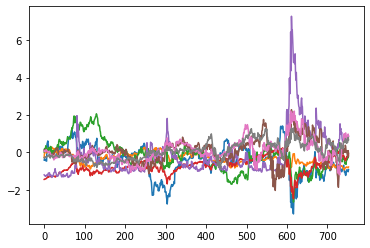

In [130]:
plt.plot(X_train1)

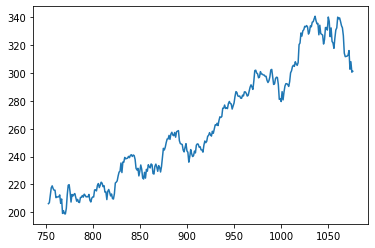

In [131]:
plt.plot(Y_test1)

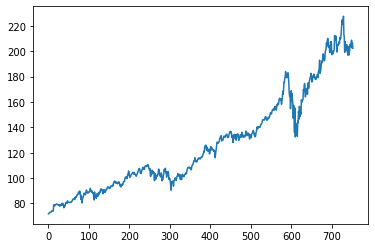

In [132]:
plt.plot(Y_train1)

In [133]:
X_test2

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
477,-0.465651,-0.763084,-1.673485,-0.614079,-0.110296,0.072082,0.447438,0.507003
379,0.058238,-0.001215,-0.011096,-0.540952,-1.006702,0.412621,0.166678,0.148008
60,0.694394,0.095886,0.741966,-0.873230,-1.333627,0.149734,-0.159353,-0.128090
78,0.834784,-0.336089,1.824182,-0.606283,-0.827421,-0.624364,-0.300785,-0.430628
1071,1.348362,0.389678,0.788513,1.858643,-0.140762,-1.475879,-2.971113,-2.864525
...,...,...,...,...,...,...,...,...
407,-0.712751,-0.302477,-0.709299,-0.770021,-0.431362,0.423261,-0.122479,0.840041
674,-1.078126,-0.582576,-0.913773,-0.702259,1.616896,0.860865,0.477471,0.219281
990,0.851326,-0.324885,1.237358,1.546913,-0.283719,1.570318,-0.882095,-1.669854
118,0.219928,-0.714533,1.556537,-1.114771,-0.073971,0.191302,0.126362,-0.456031


In [134]:
X_train2

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
663,-0.822245,-0.527801,-1.284486,-0.796699,0.809545,1.457256,0.350073,0.803476
193,-0.371758,0.097131,0.113583,-0.862107,-1.000843,-0.057757,-0.642467,-0.485795
387,-0.366320,-0.052255,-0.318638,-0.528582,-0.861402,-0.101355,-0.260269,0.029418
470,-0.448933,-0.693370,-1.400853,-0.580726,-0.459485,-0.228974,0.236080,0.475225
917,1.426809,-0.301232,1.802571,1.493733,-0.365743,1.975838,1.355448,0.606444
...,...,...,...,...,...,...,...,...
744,-1.177653,-0.830307,-0.569659,-0.453773,0.934925,0.379053,1.001994,0.738827
959,1.070265,-0.347293,1.318815,1.552820,-0.133732,-0.139434,1.486849,-0.822429
1004,1.350365,-0.077153,0.909868,1.422736,0.081874,2.238935,-0.292906,-1.663169
1057,0.639822,0.179293,0.214989,1.576178,0.265843,-1.782007,-2.241690,-2.534393


In [135]:
y_test2

,Adj Close
,MSFT
477,133.723526
379,116.791458
60,83.283882
78,89.016205
1071,312.935425
...,...
407,122.249725
674,189.758163
990,302.684998


In [136]:
y_train2

,Adj Close
,MSFT
663,179.229675
193,100.170685
387,125.320473
470,129.603882
917,243.203674
...,...
744,199.670227
959,284.191254
1004,290.675537


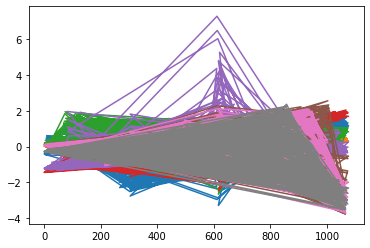

In [137]:
plt.plot(X_train2)

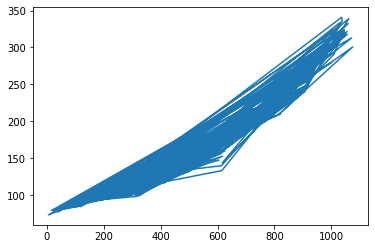

In [138]:
plt.plot(y_test2)

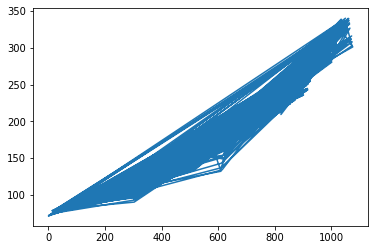

In [139]:
plt.plot(y_train2)

In [140]:
regression = { 'LR': LinearRegression(), 'SVR': SVR(), }

In [141]:
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)

In [142]:
kernel = ['linear', 'rbf', 'poly']
C_list = [10, 100]
ep_list = [0.1, 1, 5]
gamma = [0.01, 0.1]
degree = [2, 3]
params_SVR = dict( kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree )

In [143]:
X

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-0.412468,-0.273845,0.018827,-1.448259,-1.203560,0.126019,0.063751,-0.288987
1,-0.335324,0.017458,0.203352,-1.430961,-1.232854,0.113714,0.091310,-0.260042
2,-0.396482,0.042356,0.195040,-1.420472,-1.259805,0.071490,0.039302,-0.263977
3,-0.437487,0.046090,0.135194,-1.428394,-1.252774,0.149776,0.021954,-0.245130
4,-0.432621,-0.008684,0.351305,-1.420763,-1.287928,0.104941,0.097111,-0.280311
...,...,...,...,...,...,...,...,...
1072,1.156337,0.419555,0.879945,1.904155,-0.256768,-1.469032,-3.022918,-2.983669
1073,1.220345,0.339883,1.006286,1.913672,-0.349338,-1.360370,-2.829111,-3.202946
1074,1.324358,0.255231,1.049508,1.869763,-0.034131,-0.673930,-2.330709,-2.611532
1075,1.275464,0.234068,0.959739,1.819615,-0.165370,-0.701501,-2.430397,-2.534199


In [144]:
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR

    grid = GridSearchCV( estimator=model, n_jobs = 1,verbose = 10,cv = 2,scoring = 'neg_mean_squared_error',param_grid = params )

    grid_result1 = grid.fit(X_train1, Y_train1)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/2; 1/4] END fit_intercept=True, normalize=True;, score=-422.769 total time=   0.0s
[CV 2/2; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/2; 1/4] END fit_intercept=True, normalize=True;, score=-1923.788 total time=   0.0s
[CV 1/2; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/2; 2/4] END fit_intercept=True, normalize=False;, score=-422.769 total time=   0.0s
[CV 2/2; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/2; 2/4] END fit_intercept=True, normalize=False;, score=-1923.788 total time=   0.0s
[CV 1/2; 3/4] START fit_intercept=False, normalize=True.........................
[CV 1/2; 3/4] END fit_intercept=False, normalize=True;, score=-6429.956 total time=   0.0s
[CV 2/2; 3/4] START fit_intercept=False, normalize=True.........................
[CV 

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Pyt

[CV 1/2; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-2201.916 total time=   0.0s
[CV 2/2; 5/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.........
[CV 2/2; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-3343.316 total time=   0.0s
[CV 1/2; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 1/2; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-3905.751 total time=   0.0s
[CV 2/2; 6/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly........
[CV 2/2; 6/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-3901.479 total time=   0.0s
[CV 1/2; 7/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear.......
[CV 1/2; 7/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-833.413 total time=   0.0s
[CV 2/2; 7/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=linear.......
[CV 2/2; 7/72] END C=10, degree=2, epsilon=1, gamma=0.01,

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-4688.304 total time=   0.0s
[CV 1/2; 10/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear.......
[CV 1/2; 10/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-833.413 total time=   0.0s
[CV 2/2; 10/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear.......
[CV 2/2; 10/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-2219.859 total time=   0.0s
[CV 1/2; 11/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 1/2; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-2201.216 total time=   0.0s
[CV 2/2; 11/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 2/2; 11/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-3347.007 total time=   0.0s
[CV 1/2; 12/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly.........
[CV 1/2; 12/72] END C=10, degree=2, epsilon=1, gamma=0.1, k

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-3394.504 total time=   0.0s
[CV 2/2; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 2/2; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-3785.000 total time=   0.0s
[CV 1/2; 15/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly........
[CV 1/2; 15/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-3227.716 total time=   0.0s
[CV 2/2; 15/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly........
[CV 2/2; 15/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-4746.383 total time=   0.0s
[CV 1/2; 16/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear.......
[CV 1/2; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-823.510 total time=   0.0s
[CV 2/2; 16/72] START C=10, degree=2, epsilon=5, gamma=0.1, kernel=linear.......
[CV 2/2; 16/72] END C=10, degree=2, epsilon=5, gamma=0.1,

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 19/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-846.066 total time=   0.0s
[CV 2/2; 19/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear....
[CV 2/2; 19/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-2137.866 total time=   0.0s
[CV 1/2; 20/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf.......
[CV 1/2; 20/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-3526.928 total time=   0.0s
[CV 2/2; 20/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf.......
[CV 2/2; 20/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-3671.157 total time=   0.0s
[CV 1/2; 21/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly......
[CV 1/2; 21/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-3277.104 total time=   0.0s
[CV 2/2; 21/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly......
[CV 2/2; 21/72] END C=10, degree=3, epsilon=

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 23/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-2201.916 total time=   0.0s
[CV 2/2; 23/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf........
[CV 2/2; 23/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-3343.316 total time=   0.0s
[CV 1/2; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 1/2; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-3426.019 total time=   0.0s
[CV 2/2; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 2/2; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-4222.316 total time=   0.0s
[CV 1/2; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 1/2; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-833.413 total time=   0.0s
[CV 2/2; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 2/2; 25/72] END C=10, degree=3, epsilon=1, gamma

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed

[CV 2/2; 26/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-3739.212 total time=   0.0s
[CV 1/2; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 1/2; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-3299.838 total time=   0.0s
[CV 2/2; 27/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly........
[CV 2/2; 27/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-4662.406 total time=   0.0s
[CV 1/2; 28/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear.......
[CV 1/2; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-833.413 total time=   0.0s
[CV 2/2; 28/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear.......
[CV 2/2; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-2219.859 total time=   0.0s
[CV 1/2; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 1/2; 29/72] END C=10, degree=3, epsilon=1, gamma=0.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed

[CV 2/2; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-3347.007 total time=   0.0s
[CV 1/2; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 1/2; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-3385.120 total time=   0.0s
[CV 2/2; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 2/2; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-4213.999 total time=   0.0s
[CV 1/2; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......
[CV 1/2; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-823.510 total time=   0.0s
[CV 2/2; 31/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear......
[CV 2/2; 31/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-1894.078 total time=   0.0s
[CV 1/2; 32/72] START C=10, degree=3, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/2; 32/72] END C=10, degree=3, epsilon=5, gamma=0.0

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 34/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-1894.078 total time=   0.0s
[CV 1/2; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 1/2; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-2412.807 total time=   0.0s
[CV 2/2; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 2/2; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-3156.011 total time=   0.0s
[CV 1/2; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 1/2; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-3325.416 total time=   0.0s
[CV 2/2; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 2/2; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly;, score=-4432.503 total time=   0.0s
[CV 1/2; 37/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 1/2; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed


[CV 1/2; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-1407.150 total time=   0.0s
[CV 2/2; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/2; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-2481.355 total time=   0.0s
[CV 1/2; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/2; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-3331.933 total time=   0.0s
[CV 2/2; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/2; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-4576.367 total time=   0.0s
[CV 1/2; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 1/2; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-691.268 total time=   0.0s
[CV 2/2; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed

[CV 2/2; 40/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-2117.152 total time=   0.0s
[CV 1/2; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 1/2; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-1220.088 total time=   0.0s
[CV 2/2; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/2; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-3349.348 total time=   0.0s
[CV 1/2; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/2; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-2872.851 total time=   0.0s
[CV 2/2; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 2/2; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-3195.567 total time=   0.0s
[CV 1/2; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 1/2; 43/72] END C=100, degree=2, epsilon=

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-2115.930 total time=   0.0s
[CV 1/2; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/2; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-1416.592 total time=   0.0s
[CV 2/2; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/2; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-2506.753 total time=   0.0s
[CV 1/2; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/2; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-3305.235 total time=   0.0s
[CV 2/2; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 2/2; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-4607.323 total time=   0.0s
[CV 1/2; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/2; 46/72] END C=100, degree=2, epsilon=1, ga

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 46/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-2115.930 total time=   0.0s
[CV 1/2; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/2; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-1240.216 total time=   0.0s
[CV 2/2; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/2; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-3278.934 total time=   0.0s
[CV 1/2; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/2; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-2819.746 total time=   0.0s
[CV 2/2; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/2; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-3307.255 total time=   0.0s
[CV 1/2; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 1/2; 49/72] END C=100, degree=2, epsilon=5, gamma=0

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-2312.961 total time=   0.0s
[CV 1/2; 51/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly.......
[CV 1/2; 51/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-3226.249 total time=   0.0s
[CV 2/2; 51/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly.......
[CV 2/2; 51/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-4645.015 total time=   0.0s
[CV 1/2; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 1/2; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-679.490 total time=   0.0s
[CV 2/2; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 2/2; 52/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear;, score=-1908.737 total time=   0.0s
[CV 1/2; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 1/2; 53/72] END C=100, degree=2, epsilon=5, ga

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed

[CV 2/2; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-2117.152 total time=   0.0s
[CV 1/2; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/2; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-1407.150 total time=   0.0s
[CV 2/2; 56/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/2; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-2481.355 total time=   0.0s
[CV 1/2; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/2; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-3304.351 total time=   0.0s
[CV 2/2; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/2; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-4674.271 total time=   0.0s
[CV 1/2; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 1/2; 58/72] END C=100, degree=3, eps

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-1220.088 total time=   0.0s
[CV 2/2; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/2; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-3349.348 total time=   0.0s
[CV 1/2; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/2; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-3360.407 total time=   0.0s
[CV 2/2; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 2/2; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-4648.689 total time=   0.0s
[CV 1/2; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 1/2; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-706.249 total time=   0.0s
[CV 2/2; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 2/2; 61/72] END C=100, degree=3, epsilon=1,

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-3323.869 total time=   0.0s
[CV 2/2; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 2/2; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-4681.104 total time=   0.0s
[CV 1/2; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/2; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-706.249 total time=   0.0s
[CV 2/2; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 2/2; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-2115.930 total time=   0.0s
[CV 1/2; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/2; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-1240.216 total time=   0.0s
[CV 2/2; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/2; 65/72] END C=100, degree=3, epsilon=1, gam

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

In [145]:
print('Best params: ',grid_result1.best_params_)
print('Best score: ', grid_result1.best_score_)
best_search_c_1_btw = grid_result1.best_params_['C']
best_search_degree_1_btw = grid_result1.best_params_['degree']
best_search_gamma_1_btw = grid_result1.best_params_['gamma']
best_search_epsilon_1_btw = grid_result1.best_params_['epsilon']

Best params:  {'C': 100, 'degree': 2, 'epsilon': 5, 'gamma': 0.01, 'kernel': 'linear'}
Best score:  -1294.113438097504


In [146]:
means1 = grid_result1.cv_results_['mean_test_score']
stds1 = grid_result1.cv_results_['std_test_score']
params1 = grid_result1.cv_results_['params']
bar_mean1_linear = []
bar_stds1_linear = []
bar_mean1_poly = []
bar_stds1_poly = []
bar_mean1_rbf = []
bar_stds1_rbf = []
for mean1, stdev1, param1 in zip(means1, stds1, params1):
    print("%f (%f) with: %r" % (mean1, stdev1, param1))
    if param1['kernel'] == 'linear':
        bar_mean1_linear.append(mean1)
        bar_stds1_linear.append(stdev1)
    elif param1['kernel'] == 'poly': 
        bar_mean1_poly.append(mean1)
        bar_stds1_poly.append(stdev1)
    else:
        bar_mean1_rbf.append(mean1)
        bar_stds1_rbf.append(stdev1)

-1491.965983 (645.899631) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
-3599.042461 (72.114326) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
-3942.284829 (746.667232) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
-1491.965983 (645.899631) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
-2772.616015 (570.700469) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
-3903.615054 (2.135857) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
-1526.635740 (693.222784) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'linear'}
-3657.822919 (81.389365) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-3929.020162 (759.283352) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly'}
-1526.635740 (693.222784) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamm

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


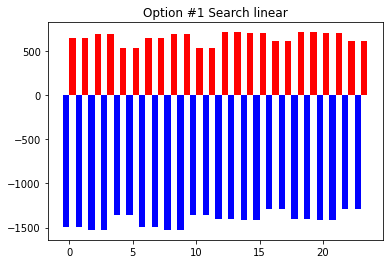

In [147]:
x = np.arange(len(bar_mean1_linear))
print(x)
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Option #1 Search linear')
rect1 = plt.bar(x-w/2,bar_mean1_linear,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_stds1_linear,w,color = 'r')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


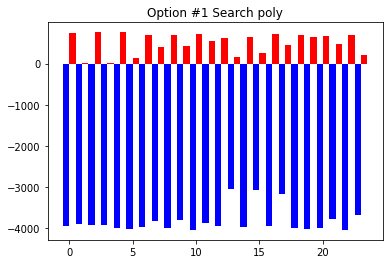

In [148]:
x = np.arange(len(bar_mean1_poly))
print(x)
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Option #1 Search poly')
rect1 = plt.bar(x-w/2,bar_mean1_poly,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_stds1_poly,w,color = 'r')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


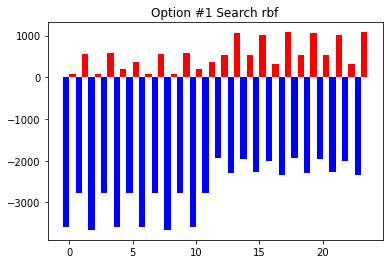

In [149]:
x = np.arange(len(bar_mean1_rbf))
print(x)
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Option #1 Search rbf')
rect1 = plt.bar(x-w/2,bar_mean1_rbf,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_stds1_rbf,w,color = 'r')
plt.show()

In [150]:
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR

    grid = GridSearchCV(estimator=model, n_jobs = 1, verbose = 10, cv = 2, scoring = 'neg_mean_squared_error', param_grid = params )

    grid_result2 = grid.fit(X_train2, y_train2)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/2; 1/4] END fit_intercept=True, normalize=True;, score=-227.945 total time=   0.0s
[CV 2/2; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/2; 1/4] END fit_intercept=True, normalize=True;, score=-233.565 total time=   0.0s
[CV 1/2; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/2; 2/4] END fit_intercept=True, normalize=False;, score=-227.945 total time=   0.0s
[CV 2/2; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/2; 2/4] END fit_intercept=True, normalize=False;, score=-233.565 total time=   0.0s
[CV 1/2; 3/4] START fit_intercept=False, normalize=True.........................
[CV 1/2; 3/4] END fit_intercept=False, normalize=True;, score=-10583.667 total time=   0.0s
[CV 2/2; 3/4] START fit_intercept=False, normalize=True.........................
[CV 2

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Pyt


[CV 1/2; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5172.821 total time=   0.0s
[CV 2/2; 3/72] START C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.......
[CV 2/2; 3/72] END C=10, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-6201.033 total time=   0.0s
[CV 1/2; 4/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear......
[CV 1/2; 4/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-258.982 total time=   0.0s
[CV 2/2; 4/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear......
[CV 2/2; 4/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=linear;, score=-243.669 total time=   0.0s
[CV 1/2; 5/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.........
[CV 1/2; 5/72] END C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-196.509 total time=   0.0s
[CV 2/2; 5/72] START C=10, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.........
[CV 2/2; 5/72] END C=10, degree=2, epsilon=0.1, gamm

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-956.817 total time=   0.0s
[CV 2/2; 8/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf..........
[CV 2/2; 8/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-1539.050 total time=   0.0s
[CV 1/2; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 1/2; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-5160.796 total time=   0.0s
[CV 2/2; 9/72] START C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly.........
[CV 2/2; 9/72] END C=10, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-6171.004 total time=   0.0s
[CV 1/2; 10/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear.......
[CV 1/2; 10/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear;, score=-257.972 total time=   0.0s
[CV 2/2; 10/72] START C=10, degree=2, epsilon=1, gamma=0.1, kernel=linear.......
[CV 2/2; 10/72] END C=10, degree=2, epsilon=1, gamma=0.1, kern

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 12/72] END C=10, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-1045.518 total time=   0.0s
[CV 1/2; 13/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 1/2; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-248.253 total time=   0.0s
[CV 2/2; 13/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear......
[CV 2/2; 13/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-237.527 total time=   0.0s
[CV 1/2; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 1/2; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-951.261 total time=   0.0s
[CV 2/2; 14/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf.........
[CV 2/2; 14/72] END C=10, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-1553.590 total time=   0.0s
[CV 1/2; 15/72] START C=10, degree=2, epsilon=5, gamma=0.01, kernel=poly........
[CV 1/2; 15/72] END C=10, degree=2, epsilon=5, gamma=0.01

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 19/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-258.982 total time=   0.0s
[CV 2/2; 19/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear....
[CV 2/2; 19/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-243.669 total time=   0.0s
[CV 1/2; 20/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf.......
[CV 1/2; 20/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-959.511 total time=   0.0s
[CV 2/2; 20/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf.......
[CV 2/2; 20/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-1537.401 total time=   0.0s
[CV 1/2; 21/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly......
[CV 1/2; 21/72] END C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5466.006 total time=   0.0s
[CV 2/2; 21/72] START C=10, degree=3, epsilon=0.1, gamma=0.01, kernel=poly......
[CV 2/2; 21/72] END C=10, degree=3, epsilon=0.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1385.484 total time=   0.0s
[CV 2/2; 24/72] START C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.......
[CV 2/2; 24/72] END C=10, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1356.454 total time=   0.0s
[CV 1/2; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 1/2; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-257.972 total time=   0.0s
[CV 2/2; 25/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear......
[CV 2/2; 25/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-245.217 total time=   0.0s
[CV 1/2; 26/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf.........
[CV 1/2; 26/72] END C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-956.817 total time=   0.0s
[CV 2/2; 26/72] START C=10, degree=3, epsilon=1, gamma=0.01, kernel=rbf.........
[CV 2/2; 26/72] END C=10, degree=3, epsilon=1, gamma=

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-257.972 total time=   0.0s
[CV 2/2; 28/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear.......
[CV 2/2; 28/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-245.217 total time=   0.0s
[CV 1/2; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 1/2; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-197.836 total time=   0.0s
[CV 2/2; 29/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf..........
[CV 2/2; 29/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-210.799 total time=   0.0s
[CV 1/2; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 1/2; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-1382.367 total time=   0.0s
[CV 2/2; 30/72] START C=10, degree=3, epsilon=1, gamma=0.1, kernel=poly.........
[CV 2/2; 30/72] END C=10, degree=3, epsilon=1, gamma=0.1, kern

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 33/72] END C=10, degree=3, epsilon=5, gamma=0.01, kernel=poly;, score=-6448.458 total time=   0.0s
[CV 1/2; 34/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear.......
[CV 1/2; 34/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-248.253 total time=   0.0s
[CV 2/2; 34/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear.......
[CV 2/2; 34/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-237.527 total time=   0.0s
[CV 1/2; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 1/2; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-210.014 total time=   0.0s
[CV 2/2; 35/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf..........
[CV 2/2; 35/72] END C=10, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-214.346 total time=   0.0s
[CV 1/2; 36/72] START C=10, degree=3, epsilon=5, gamma=0.1, kernel=poly.........
[CV 1/2; 36/72] END C=10, degree=3, epsilon=5, gamma=0.1, ker

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 37/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=linear;, score=-241.984 total time=   0.0s
[CV 1/2; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 1/2; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-218.734 total time=   0.0s
[CV 2/2; 38/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf......
[CV 2/2; 38/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-202.761 total time=   0.0s
[CV 1/2; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/2; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-3181.691 total time=   0.0s
[CV 2/2; 39/72] START C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/2; 39/72] END C=100, degree=2, epsilon=0.1, gamma=0.01, kernel=poly;, score=-3605.592 total time=   0.0s
[CV 1/2; 40/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 1/2; 40/72] END C=100, degree=2, epsilo

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-60.169 total time=   0.0s
[CV 2/2; 41/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/2; 41/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-63.847 total time=   0.0s
[CV 1/2; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/2; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-499.563 total time=   0.0s
[CV 2/2; 42/72] START C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 2/2; 42/72] END C=100, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-590.481 total time=   0.0s
[CV 1/2; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....
[CV 1/2; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-252.907 total time=   0.0s
[CV 2/2; 43/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear.....


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 43/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=linear;, score=-243.741 total time=   0.0s
[CV 1/2; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 1/2; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-219.506 total time=   0.0s
[CV 2/2; 44/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf........
[CV 2/2; 44/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=rbf;, score=-204.173 total time=   0.0s
[CV 1/2; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/2; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-3197.994 total time=   0.0s
[CV 2/2; 45/72] START C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly.......
[CV 2/2; 45/72] END C=100, degree=2, epsilon=1, gamma=0.01, kernel=poly;, score=-3594.736 total time=   0.0s
[CV 1/2; 46/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/2; 46/72] END C=100, degree=2, epsilon=1, gamma

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-58.844 total time=   0.0s
[CV 2/2; 47/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 2/2; 47/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=rbf;, score=-64.189 total time=   0.0s
[CV 1/2; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/2; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-503.462 total time=   0.0s
[CV 2/2; 48/72] START C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/2; 48/72] END C=100, degree=2, epsilon=1, gamma=0.1, kernel=poly;, score=-581.789 total time=   0.0s
[CV 1/2; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....
[CV 1/2; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-249.703 total time=   0.0s
[CV 2/2; 49/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear.....


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 49/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=linear;, score=-236.744 total time=   0.0s
[CV 1/2; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 1/2; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-209.329 total time=   0.0s
[CV 2/2; 50/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf........
[CV 2/2; 50/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=rbf;, score=-204.213 total time=   0.0s
[CV 1/2; 51/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly.......
[CV 1/2; 51/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-3200.093 total time=   0.0s
[CV 2/2; 51/72] START C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly.......
[CV 2/2; 51/72] END C=100, degree=2, epsilon=5, gamma=0.01, kernel=poly;, score=-3621.363 total time=   0.0s
[CV 1/2; 52/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=linear......
[CV 1/2; 52/72] END C=100, degree=2, epsilon=5, gamma

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-61.318 total time=   0.0s
[CV 2/2; 53/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 2/2; 53/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=rbf;, score=-64.708 total time=   0.0s
[CV 1/2; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 1/2; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-494.696 total time=   0.0s
[CV 2/2; 54/72] START C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly........
[CV 2/2; 54/72] END C=100, degree=2, epsilon=5, gamma=0.1, kernel=poly;, score=-572.298 total time=   0.0s
[CV 1/2; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 1/2; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear;, score=-259.664 total time=   0.0s
[CV 2/2; 55/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=linear...
[CV 2/2; 55/72] END C=100, degree=3, epsilon=0.1, gamma=0.0

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 56/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=rbf;, score=-202.761 total time=   0.0s
[CV 1/2; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 1/2; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-4947.994 total time=   0.0s
[CV 2/2; 57/72] START C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly.....
[CV 2/2; 57/72] END C=100, degree=3, epsilon=0.1, gamma=0.01, kernel=poly;, score=-5860.679 total time=   0.0s
[CV 1/2; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 1/2; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-259.664 total time=   0.0s
[CV 2/2; 58/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear....
[CV 2/2; 58/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=linear;, score=-241.984 total time=   0.0s
[CV 1/2; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/2; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-60.169 total time=   0.0s
[CV 2/2; 59/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf.......
[CV 2/2; 59/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=rbf;, score=-63.847 total time=   0.0s
[CV 1/2; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 1/2; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-621.045 total time=   0.0s
[CV 2/2; 60/72] START C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly......
[CV 2/2; 60/72] END C=100, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-503.082 total time=   0.0s
[CV 1/2; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 1/2; 61/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear;, score=-252.907 total time=   0.0s
[CV 2/2; 61/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=linear.....
[CV 2/2; 61/72] END C=100, degree=3, epsilon=1, gamma

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 62/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=rbf;, score=-204.173 total time=   0.0s
[CV 1/2; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 1/2; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-4918.806 total time=   0.0s
[CV 2/2; 63/72] START C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly.......
[CV 2/2; 63/72] END C=100, degree=3, epsilon=1, gamma=0.01, kernel=poly;, score=-5914.779 total time=   0.0s
[CV 1/2; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 1/2; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-252.907 total time=   0.0s
[CV 2/2; 64/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear......
[CV 2/2; 64/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=linear;, score=-243.741 total time=   0.0s
[CV 1/2; 65/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf.........
[CV 1/2; 65/72] END C=100, degree=3, epsilon=1, gamm

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 65/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=rbf;, score=-64.189 total time=   0.0s
[CV 1/2; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 1/2; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-631.766 total time=   0.0s
[CV 2/2; 66/72] START C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly........
[CV 2/2; 66/72] END C=100, degree=3, epsilon=1, gamma=0.1, kernel=poly;, score=-504.309 total time=   0.0s
[CV 1/2; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 1/2; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-249.703 total time=   0.0s
[CV 2/2; 67/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear.....
[CV 2/2; 67/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=linear;, score=-236.744 total time=   0.0s
[CV 1/2; 68/72] START C=100, degree=3, epsilon=5, gamma=0.01, kernel=rbf........
[CV 1/2; 68/72] END C=100, degree=3, epsilon=5, gamma=0.

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/2; 69/72] END C=100, degree=3, epsilon=5, gamma=0.01, kernel=poly;, score=-5939.849 total time=   0.0s
[CV 1/2; 70/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear......
[CV 1/2; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-249.703 total time=   0.0s
[CV 2/2; 70/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear......
[CV 2/2; 70/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=linear;, score=-236.744 total time=   0.0s
[CV 1/2; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 1/2; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-61.318 total time=   0.0s
[CV 2/2; 71/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf.........
[CV 2/2; 71/72] END C=100, degree=3, epsilon=5, gamma=0.1, kernel=rbf;, score=-64.708 total time=   0.0s
[CV 1/2; 72/72] START C=100, degree=3, epsilon=5, gamma=0.1, kernel=poly........
[CV 1/2; 72/72] END C=100, degree=3, epsilon=5, gamma=0.1,

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed

In [151]:
print('Best params: ',grid_result2.best_params_)
print('Best score: ', grid_result2.best_score_)
best_search_c_2_btw = grid_result2.best_params_['C']
best_search_degree_2_btw = grid_result2.best_params_['degree']
best_search_gamma_2_btw = grid_result2.best_params_['gamma']
best_search_epsilon_2_btw = grid_result2.best_params_['epsilon']

Best params:  {'C': 100, 'degree': 2, 'epsilon': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  -61.51683287788442


In [152]:
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
bar_mean2_linear = []
bar_stds2_linear = []
bar_mean2_poly = []
bar_stds2_poly = []
bar_mean2_rbf = []
bar_stds2_rbf = []
for mean2, stdev2, param2 in zip(means2, stds2, params2):
    print("%f (%f) with: %r" % (mean2, stdev2, param2))
    if param2['kernel'] == 'linear':
        bar_mean2_linear.append(mean2)
        bar_stds2_linear.append(stdev2)
    elif param2['kernel'] == 'poly': 
        bar_mean2_poly.append(mean2)
        bar_stds2_poly.append(stdev2)
    else:
        bar_mean2_rbf.append(mean2)
        bar_stds2_rbf.append(stdev2)

-251.325642 (7.656663) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
-1248.456209 (288.945265) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
-5686.927153 (514.105772) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'poly'}
-251.325642 (7.656663) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
-202.816043 (6.306913) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
-1026.873844 (25.544371) with: {'C': 10, 'degree': 2, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
-251.594387 (6.377482) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'linear'}
-1247.933216 (291.116490) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-5665.900097 (505.104254) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.01, 'kernel': 'poly'}
-251.594387 (6.377482) with: {'C': 10, 'degree': 2, 'epsilon': 1, 'gamma': 0.1, 'ke

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


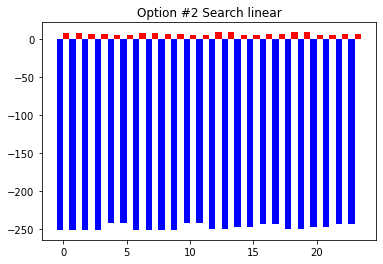

In [153]:
x = np.arange(len(bar_mean2_linear))
print(x)
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Option #2 Search linear')
rect1 = plt.bar(x-w/2,bar_mean2_linear,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_stds2_linear,w,color = 'r')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


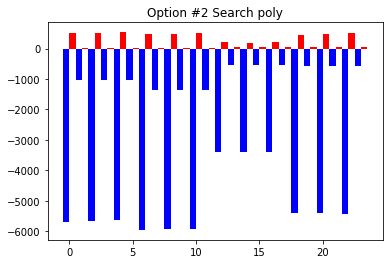

In [154]:
x = np.arange(len(bar_mean2_poly))
print(x)
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Option #2 Search poly')
rect1 = plt.bar(x-w/2,bar_mean2_poly,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_stds2_poly,w,color = 'r')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


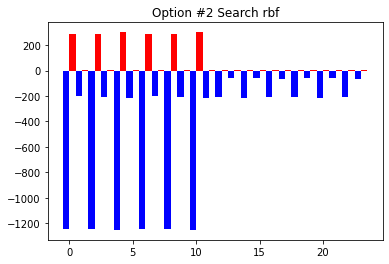

In [155]:
x = np.arange(len(bar_mean2_rbf))
print(x)
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Option #2 Search rbf')
rect1 = plt.bar(x-w/2,bar_mean2_rbf,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_stds2_rbf,w,color = 'r')
plt.show()


6.3 Prepare Parameter Dictionary and LinearRegression() , SVR()
(RandomizedSearchCV() )

6.2 Create Model List and Parameter Dictionary

In [156]:
regression = { 'LR': LinearRegression(), 'SVR': SVR(), }

In [157]:
fit_intercept = [True, False]
normalize = [True, False]
params_LR = dict( fit_intercept = fit_intercept, normalize = normalize)


In [158]:
kernel = ['linear', 'rbf', 'poly']
C_list = list(np.linspace(0.1, 150, 5, dtype = float))
ep_list = list(np.linspace(0.1, 1, 5, dtype = float))
gamma = list(np.linspace(0.01, 0.1, 5, dtype = float))
degree = [2, 3]
params_SVR = dict( kernel = kernel, C = C_list, epsilon = ep_list, gamma = gamma, degree = degree )

In [159]:
Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LM_pred = Model_LM.fit(X_train1, Y_train1).predict(X_test1)
n_clusters_LM = np.unique(LM_pred)
kmeans_LM = KMeans(n_clusters=n_clusters_LM.size,random_state=0)
clusters_LM = kmeans_LM.fit_predict(X_test1)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Us

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

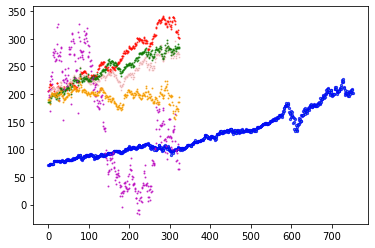

In [160]:
c_val = best_search_c_1_btw
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=best_search_gamma_1_btw)
svr_poly = SVR(kernel='poly', C=c_val, degree=best_search_degree_1_btw)
SVR_Linear = svr_lin.fit(X_train1,Y_train1).predict(X_test1)
SVR_Rbf = svr_rbf.fit(X_train1,Y_train1).predict(X_test1)
SVR_Poly = svr_poly.fit(X_train1,Y_train1).predict(X_test1)

plt.scatter(np.arange(len(Y_train1)),Y_train1, edgecolors='b',alpha=0.75,s=5)
plt.scatter(np.arange(len(Y_test1)),Y_test1, edgecolors='r',alpha=0.75,s=1)
plt.scatter(np.arange(len(LM_pred)),LM_pred, edgecolors='pink',alpha=0.75,s=1)
plt.scatter(np.arange(len(SVR_Linear)),SVR_Linear,edgecolors='green',alpha=0.75,s=1)
plt.scatter(np.arange(len(SVR_Poly)),SVR_Poly, edgecolors='m',alpha=0.75,s=1)
plt.scatter(np.arange(len(SVR_Rbf)),SVR_Rbf, edgecolors='orange',alpha=0.75,s=1)
plt.show()

In [161]:
Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
LM_pred = Model_LM.fit(X_train2, y_train2).predict(X_test2)
n_clusters_LM = np.unique(LM_pred)
kmeans_LM = KMeans(n_clusters=n_clusters_LM.size,random_state=0)
clusters_LM = kmeans_LM.fit_predict(X_test2)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Us

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

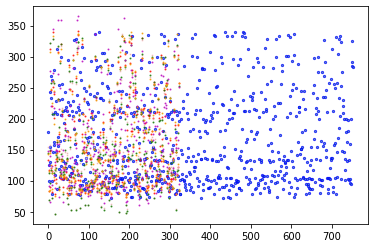

In [162]:
c_val = best_search_c_2_btw
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=best_search_gamma_2_btw)
svr_poly = SVR(kernel='poly', C=c_val, degree=best_search_degree_2_btw)
SVR_Linear = svr_lin.fit(X_train2,y_train2).predict(X_test2)
SVR_Rbf = svr_rbf.fit(X_train2,y_train2).predict(X_test2)
SVR_Poly = svr_poly.fit(X_train2,y_train2).predict(X_test2)
plt.scatter(np.arange(len(Y_train1)),y_train2, edgecolors='b',alpha=0.75,s=5)
plt.scatter(np.arange(len(Y_test1)),y_test2, edgecolors='r',alpha=0.75,s=1)
plt.scatter(np.arange(len(LM_pred)),LM_pred, edgecolors='pink',alpha=0.75,s=1)
plt.scatter(np.arange(len(SVR_Linear)),SVR_Linear,edgecolors='green',alpha=0.75,s=1)
plt.scatter(np.arange(len(SVR_Poly)),SVR_Poly, edgecolors='m',alpha=0.75,s=1)
plt.scatter(np.arange(len(SVR_Rbf)),SVR_Rbf, edgecolors='orange',alpha=0.75,s=1)
plt.show()

6.3 RandomizedSearchCV() -> (a)

In [163]:
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR
    grid_rand = RandomizedSearchCV(estimator=model, n_jobs = 1,verbose = 10,cv = 3,scoring = 'neg_mean_squared_error',param_distributions = params)
    grid_rand_result = grid_rand.fit(X_train1, Y_train1)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Pyth

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/3; 1/4] END fit_intercept=True, normalize=True;, score=-406.053 total time=   0.0s
[CV 2/3; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/3; 1/4] END fit_intercept=True, normalize=True;, score=-970.700 total time=   0.0s
[CV 3/3; 1/4] START fit_intercept=True, normalize=True..........................
[CV 3/3; 1/4] END fit_intercept=True, normalize=True;, score=-2210.796 total time=   0.0s
[CV 1/3; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/3; 2/4] END fit_intercept=True, normalize=False;, score=-406.053 total time=   0.0s
[CV 2/3; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/3; 2/4] END fit_intercept=True, normalize=False;, score=-970.700 total time=   0.0s
[CV 3/3; 2/4] START fit_intercept=True, normalize=False.........................
[CV 3/

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/3; 1/10] END C=150.0, degree=3, epsilon=0.1, gamma=0.0775, kernel=linear;, score=-1058.876 total time=   0.0s
[CV 3/3; 1/10] START C=150.0, degree=3, epsilon=0.1, gamma=0.0775, kernel=linear
[CV 3/3; 1/10] END C=150.0, degree=3, epsilon=0.1, gamma=0.0775, kernel=linear;, score=-2229.691 total time=   0.0s
[CV 1/3; 2/10] START C=150.0, degree=2, epsilon=0.325, gamma=0.1, kernel=linear.
[CV 1/3; 2/10] END C=150.0, degree=2, epsilon=0.325, gamma=0.1, kernel=linear;, score=-739.918 total time=   0.0s
[CV 2/3; 2/10] START C=150.0, degree=2, epsilon=0.325, gamma=0.1, kernel=linear.


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/3; 2/10] END C=150.0, degree=2, epsilon=0.325, gamma=0.1, kernel=linear;, score=-1044.079 total time=   0.0s
[CV 3/3; 2/10] START C=150.0, degree=2, epsilon=0.325, gamma=0.1, kernel=linear.
[CV 3/3; 2/10] END C=150.0, degree=2, epsilon=0.325, gamma=0.1, kernel=linear;, score=-2228.677 total time=   0.0s
[CV 1/3; 3/10] START C=0.1, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear..
[CV 1/3; 3/10] END C=0.1, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear;, score=-1431.666 total time=   0.0s
[CV 2/3; 3/10] START C=0.1, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear..
[CV 2/3; 3/10] END C=0.1, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear;, score=-355.767 total time=   0.0s
[CV 3/3; 3/10] START C=0.1, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear..
[CV 3/3; 3/10] END C=0.1, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear;, score=-3865.735 total time=   0.0s
[CV 1/3; 4/10] START C=112.525, degree=2, epsilon=0.775, gamma=0.0775, kernel=poly
[CV 1/3; 4/10] END C=1

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 3/3; 4/10] END C=112.525, degree=2, epsilon=0.775, gamma=0.0775, kernel=poly;, score=-3974.201 total time=   0.0s
[CV 1/3; 5/10] START C=37.575, degree=3, epsilon=0.325, gamma=0.01, kernel=rbf..
[CV 1/3; 5/10] END C=37.575, degree=3, epsilon=0.325, gamma=0.01, kernel=rbf;, score=-986.327 total time=   0.0s
[CV 2/3; 5/10] START C=37.575, degree=3, epsilon=0.325, gamma=0.01, kernel=rbf..
[CV 2/3; 5/10] END C=37.575, degree=3, epsilon=0.325, gamma=0.01, kernel=rbf;, score=-916.219 total time=   0.0s
[CV 3/3; 5/10] START C=37.575, degree=3, epsilon=0.325, gamma=0.01, kernel=rbf..
[CV 3/3; 5/10] END C=37.575, degree=3, epsilon=0.325, gamma=0.01, kernel=rbf;, score=-2929.965 total time=   0.0s
[CV 1/3; 6/10] START C=112.525, degree=2, epsilon=0.775, gamma=0.01, kernel=linear
[CV 1/3; 6/10] END C=112.525, degree=2, epsilon=0.775, gamma=0.01, kernel=linear;, score=-763.497 total time=   0.0s
[CV 2/3; 6/10] START C=112.525, degree=2, epsilon=0.775, gamma=0.01, kernel=linear


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/3; 6/10] END C=112.525, degree=2, epsilon=0.775, gamma=0.01, kernel=linear;, score=-1061.352 total time=   0.0s
[CV 3/3; 6/10] START C=112.525, degree=2, epsilon=0.775, gamma=0.01, kernel=linear
[CV 3/3; 6/10] END C=112.525, degree=2, epsilon=0.775, gamma=0.01, kernel=linear;, score=-2205.686 total time=   0.0s
[CV 1/3; 7/10] START C=112.525, degree=3, epsilon=1.0, gamma=0.05500000000000001, kernel=poly
[CV 1/3; 7/10] END C=112.525, degree=3, epsilon=1.0, gamma=0.05500000000000001, kernel=poly;, score=-2060.343 total time=   0.0s
[CV 2/3; 7/10] START C=112.525, degree=3, epsilon=1.0, gamma=0.05500000000000001, kernel=poly
[CV 2/3; 7/10] END C=112.525, degree=3, epsilon=1.0, gamma=0.05500000000000001, kernel=poly;, score=-593.555 total time=   0.0s
[CV 3/3; 7/10] START C=112.525, degree=3, epsilon=1.0, gamma=0.05500000000000001, kernel=poly
[CV 3/3; 7/10] END C=112.525, degree=3, epsilon=1.0, gamma=0.05500000000000001, kernel=poly;, score=-5441.896 total time=   0.0s
[CV 1/3; 8/10

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/3; 9/10] END C=150.0, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1291.304 total time=   0.0s
[CV 2/3; 9/10] START C=150.0, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.....
[CV 2/3; 9/10] END C=150.0, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-1057.468 total time=   0.0s
[CV 3/3; 9/10] START C=150.0, degree=3, epsilon=0.1, gamma=0.1, kernel=poly.....
[CV 3/3; 9/10] END C=150.0, degree=3, epsilon=0.1, gamma=0.1, kernel=poly;, score=-7425.374 total time=   0.0s
[CV 1/3; 10/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear
[CV 1/3; 10/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear;, score=-728.492 total time=   0.0s
[CV 2/3; 10/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear
[CV 2/3; 10/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear;, score=-1058.871 total time=   0.0s
[CV 3/3; 10/10] START C=75.05, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 3/3; 10/10] END C=75.05, degree=2, epsilon=0.1, gamma=0.0325, kernel=linear;, score=-2234.850 total time=   0.0s


6.3 RandomizedCV() -> (b)

In [164]:
print('Best params: ',grid_rand_result.best_params_)
print('Best score: ', grid_rand_result.best_score_)

Best params:  {'kernel': 'linear', 'gamma': 0.1, 'epsilon': 0.325, 'degree': 2, 'C': 150.0}
Best score:  -1337.5579514719013


In [165]:
means = grid_rand_result.cv_results_['mean_test_score']
stds = grid_rand_result.cv_results_['std_test_score']
params = grid_rand_result.cv_results_['params']
bestmodelbtw = SVR(kernel = grid_rand_result.best_params_['kernel'], C = grid_rand_result.best_params_['C'], degree= grid_rand_result.best_params_['degree'], epsilon = grid_rand_result.best_params_['epsilon'], gamma = grid_rand_result.best_params_['gamma'])
bestmodelbtw_pred = bestmodelbtw.fit(X_train1,Y_train1).predict(X_test1)

bar_mean1_rand_linear = []
bar_stds1_rand_linear = []
bar_mean1_rand_poly = []
bar_stds1_rand_poly = []
bar_mean1_rand_rbf = []
bar_stds1_rand_rbf = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    if param['kernel'] == 'linear':
        bar_mean1_rand_linear.append(mean)
        bar_stds1_rand_linear.append(stdev)
    elif param['kernel'] == 'poly': 
        bar_mean1_rand_poly.append(mean)
        bar_stds1_rand_poly.append(stdev)
    else:
        bar_mean1_rand_rbf.append(mean)
        bar_stds1_rand_rbf.append(stdev)

-1338.554518 (644.521935) with: {'kernel': 'linear', 'gamma': 0.0775, 'epsilon': 0.1, 'degree': 3, 'C': 150.0}
-1337.557951 (642.234918) with: {'kernel': 'linear', 'gamma': 0.1, 'epsilon': 0.325, 'degree': 2, 'C': 150.0}
-1884.389293 (1468.261681) with: {'kernel': 'linear', 'gamma': 0.0325, 'epsilon': 0.1, 'degree': 2, 'C': 0.1}
-2196.850722 (1257.767075) with: {'kernel': 'poly', 'gamma': 0.0775, 'epsilon': 0.775, 'degree': 2, 'C': 112.525}
-1610.836756 (933.203513) with: {'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 0.325, 'degree': 3, 'C': 37.575}
-1343.511608 (621.657662) with: {'kernel': 'linear', 'gamma': 0.01, 'epsilon': 0.775, 'degree': 2, 'C': 112.525}
-2698.598032 (2030.128055) with: {'kernel': 'poly', 'gamma': 0.05500000000000001, 'epsilon': 1.0, 'degree': 3, 'C': 112.525}
-1882.828913 (1466.901297) with: {'kernel': 'linear', 'gamma': 0.0325, 'epsilon': 1.0, 'degree': 2, 'C': 0.1}
-3258.048545 (2948.289695) with: {'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.1, 'degree': 3, 'C'

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


[0 1 2 3 4 5]


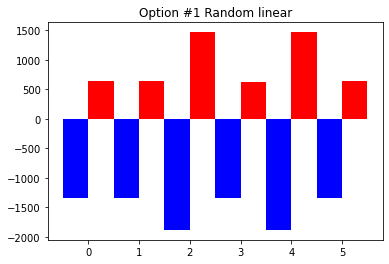

In [166]:
x = np.arange(len(bar_mean1_rand_linear))
print(x)
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Option #1 Random linear')
rect1 = plt.bar(x-w/2,bar_mean1_rand_linear,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_stds1_rand_linear,w,color = 'r')
plt.show()

[0 1 2]


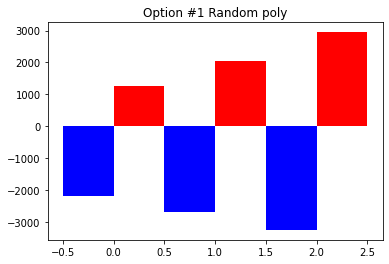

In [167]:
x = np.arange(len(bar_mean1_rand_poly))
print(x)
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Option #1 Random poly')
rect1 = plt.bar(x-w/2,bar_mean1_rand_poly,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_stds1_rand_poly,w,color = 'r')
plt.show()

[0]


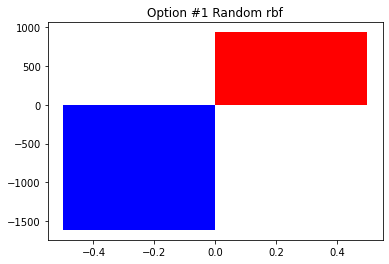

In [168]:
x = np.arange(len(bar_mean1_rand_rbf))
print(x)
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Option #1 Random rbf')
rect1 = plt.bar(x-w/2,bar_mean1_rand_rbf,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_stds1_rand_rbf,w,color = 'r')
plt.show()

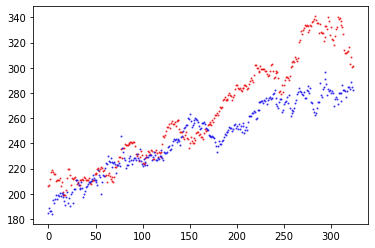

In [169]:
plt.scatter(np.arange(len(Y_test1)),Y_test1, edgecolors='r',alpha=0.75,s=1)
plt.scatter(np.arange(len(bestmodelbtw_pred)),bestmodelbtw_pred, edgecolors='b',alpha=0.75,s=1)
plt.show()

In [170]:
for EST in regression:
    model = regression[EST]
    if (EST == 'LR'):
        params = params_LR
    else:
        params = params_SVR
    grid_rand = RandomizedSearchCV(estimator=model, n_jobs = 1,verbose = 10,cv = 3,scoring = 'neg_mean_squared_error',param_distributions = params)
    grid_rand_result = grid_rand.fit(X_train2, y_train2)


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Pyth

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START fit_intercept=True, normalize=True..........................
[CV 1/3; 1/4] END fit_intercept=True, normalize=True;, score=-211.971 total time=   0.0s
[CV 2/3; 1/4] START fit_intercept=True, normalize=True..........................
[CV 2/3; 1/4] END fit_intercept=True, normalize=True;, score=-252.767 total time=   0.0s
[CV 3/3; 1/4] START fit_intercept=True, normalize=True..........................
[CV 3/3; 1/4] END fit_intercept=True, normalize=True;, score=-210.488 total time=   0.0s
[CV 1/3; 2/4] START fit_intercept=True, normalize=False.........................
[CV 1/3; 2/4] END fit_intercept=True, normalize=False;, score=-211.971 total time=   0.0s
[CV 2/3; 2/4] START fit_intercept=True, normalize=False.........................
[CV 2/3; 2/4] END fit_intercept=True, normalize=False;, score=-252.767 total time=   0.0s
[CV 3/3; 2/4] START fit_intercept=True, normalize=False.........................
[CV 3/3

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 1/3; 3/10] END C=150.0, degree=2, epsilon=0.325, gamma=0.1, kernel=linear;, score=-233.365 total time=   0.0s
[CV 2/3; 3/10] START C=150.0, degree=2, epsilon=0.325, gamma=0.1, kernel=linear.
[CV 2/3; 3/10] END C=150.0, degree=2, epsilon=0.325, gamma=0.1, kernel=linear;, score=-279.732 total time=   0.0s
[CV 3/3; 3/10] START C=150.0, degree=2, epsilon=0.325, gamma=0.1, kernel=linear.


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 3/3; 3/10] END C=150.0, degree=2, epsilon=0.325, gamma=0.1, kernel=linear;, score=-216.230 total time=   0.0s
[CV 1/3; 4/10] START C=0.1, degree=3, epsilon=0.55, gamma=0.0775, kernel=linear.
[CV 1/3; 4/10] END C=0.1, degree=3, epsilon=0.55, gamma=0.0775, kernel=linear;, score=-1518.255 total time=   0.0s
[CV 2/3; 4/10] START C=0.1, degree=3, epsilon=0.55, gamma=0.0775, kernel=linear.
[CV 2/3; 4/10] END C=0.1, degree=3, epsilon=0.55, gamma=0.0775, kernel=linear;, score=-2246.393 total time=   0.0s
[CV 3/3; 4/10] START C=0.1, degree=3, epsilon=0.55, gamma=0.0775, kernel=linear.
[CV 3/3; 4/10] END C=0.1, degree=3, epsilon=0.55, gamma=0.0775, kernel=linear;, score=-1835.418 total time=   0.0s
[CV 1/3; 5/10] START C=150.0, degree=2, epsilon=0.1, gamma=0.1, kernel=poly.....
[CV 1/3; 5/10] END C=150.0, degree=2, epsilon=0.1, gamma=0.1, kernel=poly;, score=-507.952 total time=   0.0s
[CV 2/3; 5/10] START C=150.0, degree=2, epsilon=0.1, gamma=0.1, kernel=poly.....
[CV 2/3; 5/10] END C=150.0

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/3; 6/10] END C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=rbf;, score=-73.051 total time=   0.0s
[CV 3/3; 6/10] START C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=rbf
[CV 3/3; 6/10] END C=112.525, degree=3, epsilon=0.1, gamma=0.05500000000000001, kernel=rbf;, score=-64.678 total time=   0.0s
[CV 1/3; 7/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.1, kernel=linear....
[CV 1/3; 7/10] END C=0.1, degree=2, epsilon=0.55, gamma=0.1, kernel=linear;, score=-1518.255 total time=   0.0s
[CV 2/3; 7/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.1, kernel=linear....
[CV 2/3; 7/10] END C=0.1, degree=2, epsilon=0.55, gamma=0.1, kernel=linear;, score=-2246.393 total time=   0.0s
[CV 3/3; 7/10] START C=0.1, degree=2, epsilon=0.55, gamma=0.1, kernel=linear....
[CV 3/3; 7/10] END C=0.1, degree=2, epsilon=0.55, gamma=0.1, kernel=linear;, score=-1835.418 total time=   0.0s
[CV 1/3; 8/10] START C=0.1, degree=3, epsilon=0.775, gamma=0.0325, kernel=po

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

[CV 2/3; 9/10] END C=112.525, degree=2, epsilon=0.1, gamma=0.0775, kernel=poly;, score=-487.533 total time=   0.0s
[CV 3/3; 9/10] START C=112.525, degree=2, epsilon=0.1, gamma=0.0775, kernel=poly
[CV 3/3; 9/10] END C=112.525, degree=2, epsilon=0.1, gamma=0.0775, kernel=poly;, score=-566.601 total time=   0.0s
[CV 1/3; 10/10] START C=0.1, degree=3, epsilon=0.775, gamma=0.01, kernel=poly...
[CV 1/3; 10/10] END C=0.1, degree=3, epsilon=0.775, gamma=0.01, kernel=poly;, score=-5783.943 total time=   0.0s
[CV 2/3; 10/10] START C=0.1, degree=3, epsilon=0.775, gamma=0.01, kernel=poly...
[CV 2/3; 10/10] END C=0.1, degree=3, epsilon=0.775, gamma=0.01, kernel=poly;, score=-5934.118 total time=   0.0s
[CV 3/3; 10/10] START C=0.1, degree=3, epsilon=0.775, gamma=0.01, kernel=poly...
[CV 3/3; 10/10] END C=0.1, degree=3, epsilon=0.775, gamma=0.01, kernel=poly;, score=-6336.991 total time=   0.0s


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names tha

In [171]:
print('Best params: ',grid_rand_result.best_params_)
print('Best score: ', grid_rand_result.best_score_)

Best params:  {'kernel': 'rbf', 'gamma': 0.05500000000000001, 'epsilon': 0.1, 'degree': 3, 'C': 112.525}
Best score:  -75.22592244280858


In [172]:
means = grid_rand_result.cv_results_['mean_test_score']
stds = grid_rand_result.cv_results_['std_test_score']
params = grid_rand_result.cv_results_['params']
bestmodelbtw = SVR(kernel = grid_rand_result.best_params_['kernel'], C = grid_rand_result.best_params_['C'], degree= grid_rand_result.best_params_['degree'], epsilon = grid_rand_result.best_params_['epsilon'], gamma = grid_rand_result.best_params_['gamma'])
bestmodelbtw_pred = bestmodelbtw.fit(X_train2,y_train2).predict(X_test2)


bar_mean2_rand_linear = []
bar_stds2_rand_linear = []
bar_mean2_rand_poly = []
bar_stds2_rand_poly = []
bar_mean2_rand_rbf = []
bar_stds2_rand_rbf = []
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    if param['kernel'] == 'linear':
        bar_mean2_rand_linear.append(mean)
        bar_stds2_rand_linear.append(stdev)
    elif param['kernel'] == 'poly': 
        bar_mean2_rand_poly.append(mean)
        bar_stds2_rand_poly.append(stdev)
    else:
        bar_mean2_rand_rbf.append(mean)
        bar_stds2_rand_rbf.append(stdev)

-5556.572477 (237.813264) with: {'kernel': 'rbf', 'gamma': 0.05500000000000001, 'epsilon': 0.1, 'degree': 2, 'C': 0.1}
-88.201556 (11.522657) with: {'kernel': 'rbf', 'gamma': 0.0775, 'epsilon': 0.325, 'degree': 3, 'C': 37.575}
-243.108948 (26.824737) with: {'kernel': 'linear', 'gamma': 0.1, 'epsilon': 0.325, 'degree': 2, 'C': 150.0}
-1866.688688 (298.082143) with: {'kernel': 'linear', 'gamma': 0.0775, 'epsilon': 0.55, 'degree': 3, 'C': 0.1}
-503.462382 (36.962186) with: {'kernel': 'poly', 'gamma': 0.1, 'epsilon': 0.1, 'degree': 2, 'C': 150.0}
-75.225922 (9.624276) with: {'kernel': 'rbf', 'gamma': 0.05500000000000001, 'epsilon': 0.1, 'degree': 3, 'C': 112.525}
-1866.688688 (298.082143) with: {'kernel': 'linear', 'gamma': 0.1, 'epsilon': 0.55, 'degree': 2, 'C': 0.1}
-5978.242704 (223.832397) with: {'kernel': 'poly', 'gamma': 0.0325, 'epsilon': 0.775, 'degree': 3, 'C': 0.1}
-524.392927 (32.500310) with: {'kernel': 'poly', 'gamma': 0.0775, 'epsilon': 0.1, 'degree': 2, 'C': 112.525}
-6018.3

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


[0 1 2]


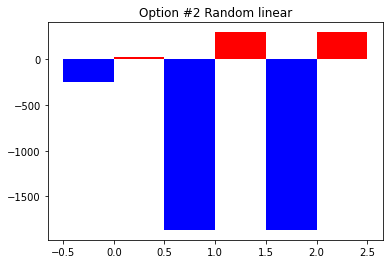

In [173]:
x = np.arange(len(bar_mean2_rand_linear))
print(x)
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Option #2 Random linear')
rect1 = plt.bar(x-w/2,bar_mean2_rand_linear,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_stds2_rand_linear,w,color = 'r')
plt.show()

[0 1 2 3]


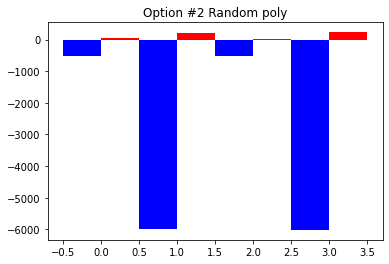

In [174]:
x = np.arange(len(bar_mean2_rand_poly))
print(x)
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Option #2 Random poly')
rect1 = plt.bar(x-w/2,bar_mean2_rand_poly,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_stds2_rand_poly,w,color = 'r')
plt.show()

[0 1 2]


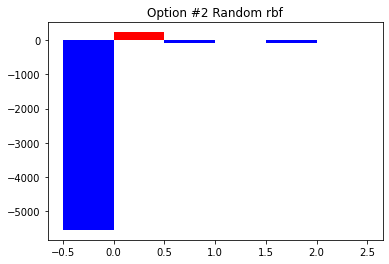

In [175]:
x = np.arange(len(bar_mean2_rand_rbf))
print(x)
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Option #2 Random rbf')
rect1 = plt.bar(x-w/2,bar_mean2_rand_rbf,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_stds2_rand_rbf,w,color = 'r')
plt.show()

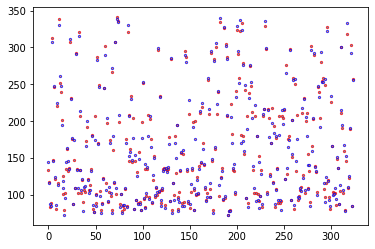

In [176]:
plt.scatter(np.arange(len(y_test2)),y_test2, edgecolors='r',alpha=0.75,s=5)
plt.scatter(np.arange(len(bestmodelbtw_pred)),bestmodelbtw_pred, edgecolors='b',alpha=0.75,s=5)
plt.show()